In [194]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import re
import seaborn as sns
import datetime

In [195]:
url = "http://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"

In [196]:
df = pd.read_csv(url, sep=';')

In [197]:
# Task 1.1 - Identify 5 unique features from this data set
# Dato: weekday or weekend
# Dato: winter, spring, summer or autumn
# Planlagt/FaktiskAnkomst: delays
# Ankomst/avgang: time on bus stop
# Passasjer_Ombord/Kjøretøy_Kapasitet: how many seats are not in use

In [198]:
# Dato: weekday or weekend
df['Dato'] =pd.to_datetime(df['Dato'], errors='coerce')
df['Weekday_end'] = df['Dato'].dt.dayofweek
df["Weekday_end"] = df["Weekday_end"].replace([0,1,2,3,4], "Weekday")
df["Weekday_end"] = df["Weekday_end"].replace([5,6], "Weekend")
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Weekday_end
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,Weekday
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,Weekend
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,Weekend
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,Weekday
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2,Weekday
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2,Weekday
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3,Weekday
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5,Weekday


In [199]:
# Dato: winter, spring, summer or autumn
df['Season'] = df['Dato'].dt.month
df["Season"] = df["Season"].replace([12,1,2], "Winter")
df["Season"] = df["Season"].replace([3,4,5], "Spring")
df["Season"] = df["Season"].replace([6,7,8], "Summer")
df["Season"] = df["Season"].replace([9,10,11], "Autumn")
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Weekday_end,Season
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,Weekday,Autumn
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,Weekend,Summer
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,Weekend,Spring
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,Weekday,Summer
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,Weekday,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2,Weekday,Autumn
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2,Weekday,Summer
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3,Weekday,Autumn
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5,Weekday,Summer


In [200]:
# Planlagt/FaktiskAnkomst: delays
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Delays'] = df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"]-df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"]

In [201]:
df['Delays'] = df['Delays'].dt.total_seconds()


In [202]:
conditions = [
    (df['Delays'] < 0),
    (df['Delays'] >= 0) & (df['Delays'] < 60),
    (df['Delays'] >= 60)
]

values=['Early', 'Late', 'OnTime']

df['Delayed'] = np.select(conditions, values)
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Weekday_end,Season,Delays,Delayed
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2021-10-24 10:53:53,10:53:59,2021-10-24 10:53:00,10:53:00,112,5,Weekday,Autumn,53.0,Late
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2021-10-24 13:12:20,13:12:26,2021-10-24 13:12:00,13:12:00,112,5,Weekend,Summer,20.0,Late
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2021-10-24 10:18:56,10:19:21,2021-10-24 10:19:00,10:19:00,112,6,Weekend,Spring,-4.0,Early
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2021-10-24 13:52:04,13:52:26,2021-10-24 13:51:00,13:51:00,112,10,Weekday,Summer,64.0,OnTime
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2021-10-24 07:34:13,07:34:53,2021-10-24 07:33:00,07:33:00,112,10,Weekday,Summer,73.0,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,...,2021-10-24 16:23:18,16:23:48,2021-10-24 16:10:00,16:10:00,151,2,Weekday,Autumn,798.0,OnTime
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,...,2021-10-24 06:00:32,06:00:40,2021-10-24 05:59:00,05:59:00,151,2,Weekday,Summer,92.0,OnTime
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,...,2021-10-24 17:42:43,17:43:10,2021-10-24 17:32:00,17:32:00,106,3,Weekday,Autumn,643.0,OnTime
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,...,2021-10-24 06:00:11,06:00:23,2021-10-24 05:59:00,05:59:00,151,5,Weekday,Summer,71.0,OnTime


In [203]:
# Ankomst/avgang: time on bus stop
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce')
df['Time_On_Stop'] = df["Tidspunkt_Faktisk_Avgang_Holdeplass_Fra"]-df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"]

In [204]:
df['Time_On_Stop'] = df['Time_On_Stop'].dt.total_seconds()

In [205]:
conditions = [
    (df['Time_On_Stop'] >= 0) & (df['Time_On_Stop'] < 20),
    (df['Time_On_Stop'] >= 20) & (df['Time_On_Stop'] < 40),
    (df['Time_On_Stop'] >= 40) & (df['Time_On_Stop'] < 60),
    (df['Time_On_Stop'] >= 60) 
]

values=['0-20sek', '20-40sek', '40-60sek', '60+']

df['Time_On_Bus_Stop'] = np.select(conditions, values)
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Weekday_end,Season,Delays,Delayed,Time_On_Stop,Time_On_Bus_Stop
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2021-10-24 10:53:00,10:53:00,112,5,Weekday,Autumn,53.0,Late,6.0,0-20sek
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2021-10-24 13:12:00,13:12:00,112,5,Weekend,Summer,20.0,Late,6.0,0-20sek
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2021-10-24 10:19:00,10:19:00,112,6,Weekend,Spring,-4.0,Early,25.0,20-40sek
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2021-10-24 13:51:00,13:51:00,112,10,Weekday,Summer,64.0,OnTime,22.0,20-40sek
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2021-10-24 07:33:00,07:33:00,112,10,Weekday,Summer,73.0,OnTime,40.0,40-60sek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,...,2021-10-24 16:10:00,16:10:00,151,2,Weekday,Autumn,798.0,OnTime,30.0,20-40sek
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,...,2021-10-24 05:59:00,05:59:00,151,2,Weekday,Summer,92.0,OnTime,8.0,0-20sek
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,...,2021-10-24 17:32:00,17:32:00,106,3,Weekday,Autumn,643.0,OnTime,27.0,20-40sek
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,...,2021-10-24 05:59:00,05:59:00,151,5,Weekday,Summer,71.0,OnTime,12.0,0-20sek


In [206]:
# Passasjer_Ombord/Kjøretøy_Kapasitet: how many seats are not in use
df['Not_In_Use'] = df["Kjøretøy_Kapasitet"] - df["Passasjerer_Ombord"]
df['Not_In_Use_%'] = (100 * df["Not_In_Use"])/df["Kjøretøy_Kapasitet"]
df['Not_In_Use_%'] = df['Not_In_Use_%'].round(decimals=0)
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Kjøretøy_Kapasitet,Passasjerer_Ombord,Weekday_end,Season,Delays,Delayed,Time_On_Stop,Time_On_Bus_Stop,Not_In_Use,Not_In_Use_%
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,112,5,Weekday,Autumn,53.0,Late,6.0,0-20sek,107,96.0
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,112,5,Weekend,Summer,20.0,Late,6.0,0-20sek,107,96.0
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,112,6,Weekend,Spring,-4.0,Early,25.0,20-40sek,106,95.0
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,112,10,Weekday,Summer,64.0,OnTime,22.0,20-40sek,102,91.0
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,112,10,Weekday,Summer,73.0,OnTime,40.0,40-60sek,102,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,...,151,2,Weekday,Autumn,798.0,OnTime,30.0,20-40sek,149,99.0
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,...,151,2,Weekday,Summer,92.0,OnTime,8.0,0-20sek,149,99.0
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,...,106,3,Weekday,Autumn,643.0,OnTime,27.0,20-40sek,103,97.0
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,...,151,5,Weekday,Summer,71.0,OnTime,12.0,0-20sek,146,97.0


In [207]:
# Task 1.3 Visualize each feature in the form of a graph using python libraries

In [208]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

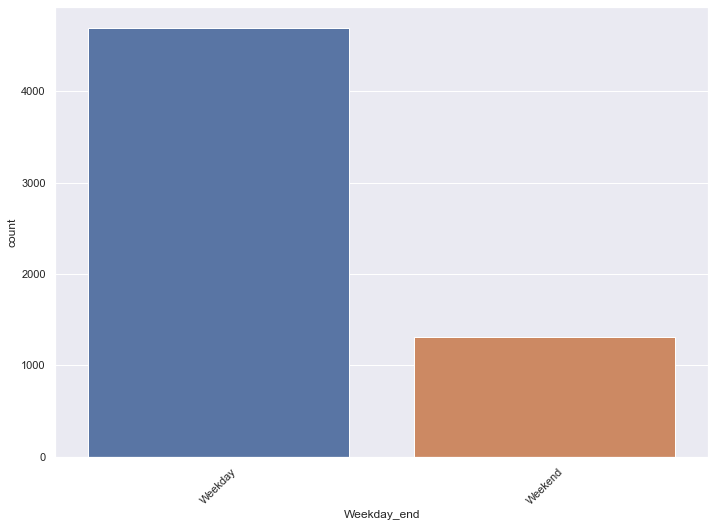

In [209]:
# Weekdays or Weekend
sns.countplot(x='Weekday_end', data=df);
plt.xticks(rotation=45);


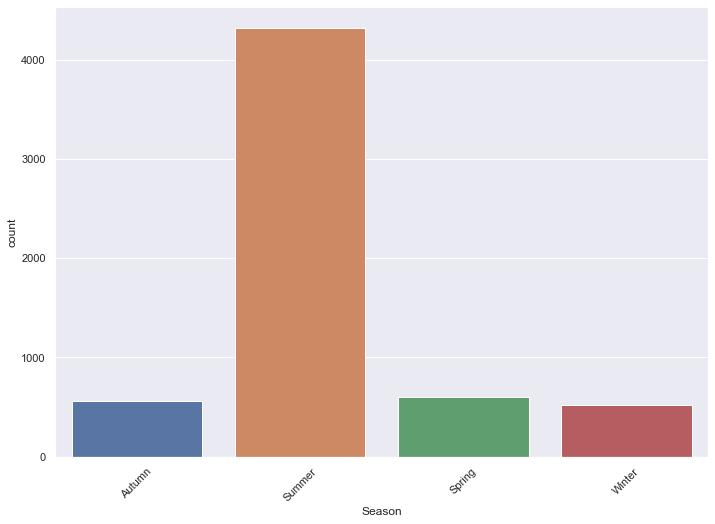

In [210]:
# Summer, winter, autumn, spring
sns.countplot(x='Season', data=df);
plt.xticks(rotation=45);

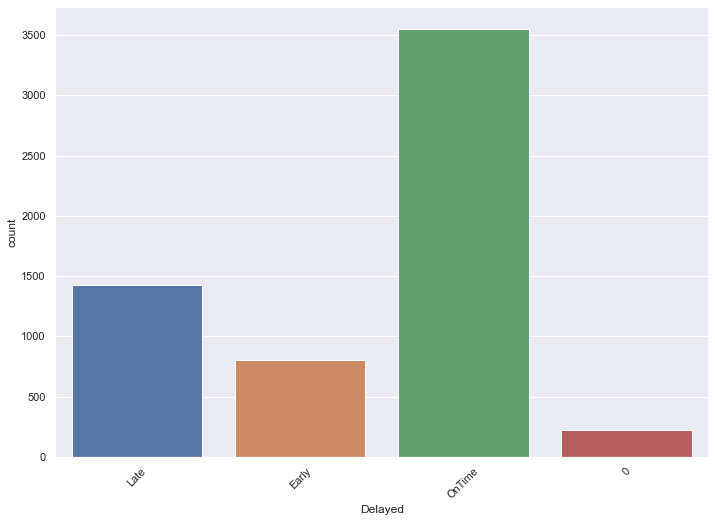

In [211]:
# How delayed, early or on time is the bus
sns.countplot(x='Delayed', data=df);
plt.xticks(rotation=45);

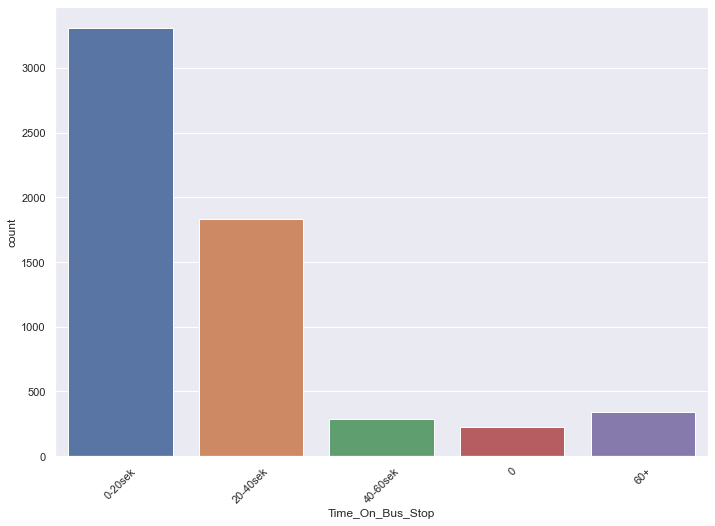

In [212]:
# Time on bus stop
sns.countplot(x='Time_On_Bus_Stop', data=df);
plt.xticks(rotation=45);

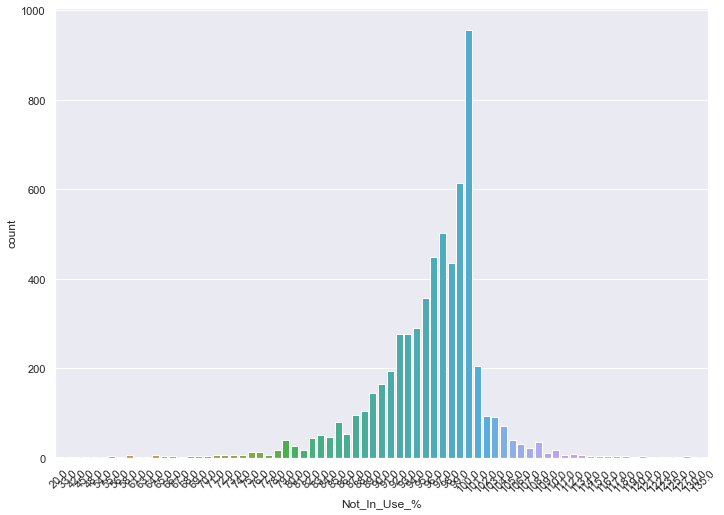

In [213]:
# Seats not in use
sns.countplot(x='Not_In_Use_%', data=df);
plt.xticks(rotation=45);